# Multi Layer Perceptron for IRIS Flower Classification - Solving a Binary Classification Problem

## Using Keras to Build ANN - MLP

#**Part 1 : Understanding the Data**

## Load IRIS Dataset in a Table - Read from a CSV File

In [1]:
import pandas as pd
import numpy as np

df_iris = pd.read_csv('IRIS.csv')
df_iris.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [2]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [3]:
df_iris['species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualize scaled features

X_scaled type is <class 'numpy.ndarray'>


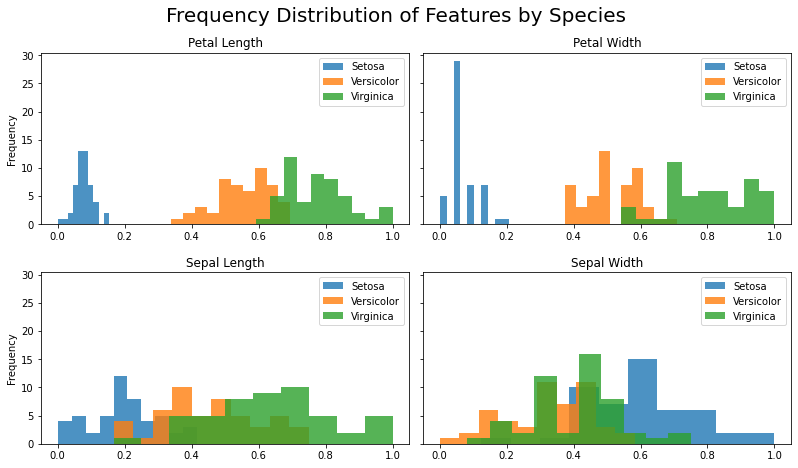

In [5]:
# Scaling of X
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

X = df_iris[['sepal_length','sepal_width','petal_length','petal_width']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print('X_scaled type is',type(X_scaled))

#df=df_iris

y_species = df_iris['species']#pd.Series(y, name='species')

X_scaled_df = pd.DataFrame(X_scaled,columns=['sepal_length','sepal_width',
                                             'petal_length','petal_width'])
df = pd.concat([X_scaled_df, y_species], axis=1)

# Notice x-axis on subplots are all the same for all features (0 to 1) after scaling.
fig = plt.figure(figsize=(12,7))
fig.suptitle('Frequency Distribution of Features by Species ',fontsize=20)

ax1 = fig.add_subplot(221)
df.groupby("species").petal_length.plot(kind='hist',alpha=0.8,legend=True,title='Petal Length')
ax2 = fig.add_subplot(222,sharey=ax1)
df.groupby("species").petal_width.plot(kind='hist',alpha=0.8,legend=True,title='Petal Width')
ax3 = fig.add_subplot(223,sharey=ax1)
df.groupby("species").sepal_length.plot(kind='hist',alpha=0.8,legend=True,title='Sepal Length')
ax4 = fig.add_subplot(224,sharey=ax1)
df.groupby("species").sepal_width.plot(kind='hist',alpha=0.8,legend=True,title='Sepal Width')

plt.tight_layout(pad=4, w_pad=1, h_pad=1.5)
plt.show()


## Summary statistics

In [6]:
# Summary statistics
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Alternatively, we may get the same Dataset from Scikitlearn Dataset

In [7]:
from sklearn import datasets

In [8]:
# import some data to play with
iris = datasets.load_iris()

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Features

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Class Labels/Categories

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Dataset - Features and Target Labels

In [12]:
X = iris.data  
y = iris.target

In [13]:
X.shape

(150, 4)

In [14]:
y.shape

(150,)

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Visualization Different Flower classes in a 2D feature Space

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

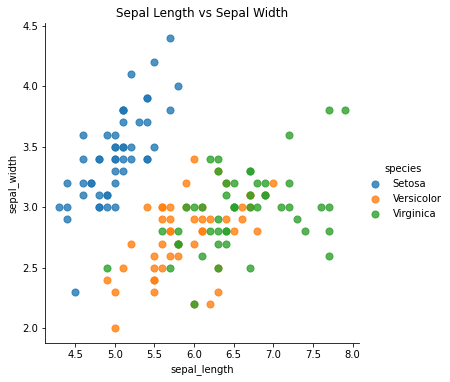

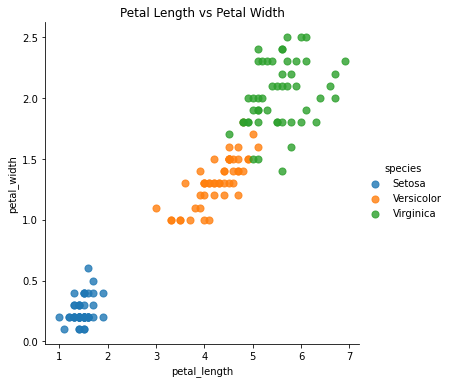

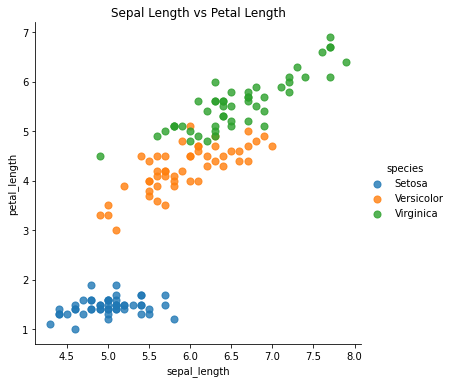

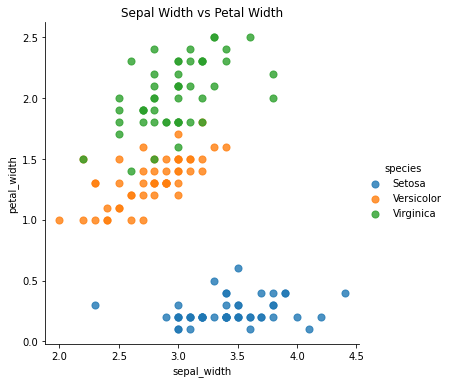

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df_iris
sns.lmplot('sepal_length', 'sepal_width', data=data, fit_reg=False, hue="species", scatter_kws={"marker": "D", "s": 50})
plt.title('Sepal Length vs Sepal Width')

sns.lmplot('petal_length', 'petal_width', data=data, fit_reg=False, hue="species", scatter_kws={"marker": "D", "s": 50})
plt.title('Petal Length vs Petal Width')

sns.lmplot('sepal_length', 'petal_length', data=data, fit_reg=False, hue="species", scatter_kws={"marker": "D", "s": 50})
plt.title('Sepal Length vs Petal Length')

sns.lmplot('sepal_width', 'petal_width', data=data, fit_reg=False, hue="species", scatter_kws={"marker": "D", "s": 50})
plt.title('Sepal Width vs Petal Width')

plt.show()


# **Part 2: Build the MLP Model**

## Solve a Binary Classification Problem 

## Select all the features or a feature subset?

In [18]:
#num_sel_feat = 2
num_sel_feat = 4


### Binary Classifier - 2 class Labels

In [19]:

# Select Setosa and Versicolor
#X = iris.data[:100, :2]    # we only take the first two features.
#X = iris.data[:100, 2:]    # we only take the last two features.

X = iris.data[:100, :]    # we only take all four features.

y = iris.target[:100]       # labels for Setosa and Versicolor - Binary Classifier


In [20]:
'''
# Select Versicolor and Verginica
X = iris.data[50:, [0,2]]   # we only take the first two features.
y = iris.target[50:]     # labels for Versicolor and Verginica - Binary Classifier

y = y - 1
'''

'''
# Select Setosa and Verginica
X1 = iris.data[0:50:, :2]   # we only take the first two features.
X2 = iris.data[100:, :2] 
X = np.concatenate([X1, X2])
y1=iris.target[:50]    # labels - setosa
y2=iris.target[100:]   # labels - virginica 
y2 = y2-1
y = np.concatenate([y1, y2])
'''

'\n# Select Setosa and Verginica\nX1 = iris.data[0:50:, :2]   # we only take the first two features.\nX2 = iris.data[100:, :2] \nX = np.concatenate([X1, X2])\ny1=iris.target[:50]    # labels - setosa\ny2=iris.target[100:]   # labels - virginica \ny2 = y2-1\ny = np.concatenate([y1, y2])\n'

In [21]:
X.shape

(100, 4)

In [22]:
#X

In [23]:
print('\n Distinct Class labels:', np.unique(y))


 Distinct Class labels: [0 1]


In [24]:
y
#y.shape

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Split Data into Training and Test Set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=101)

In [27]:
print('\n Shape of Training data : ', X_train.shape)
print('\n Shape of Test data : ', X_test.shape)


 Shape of Training data :  (70, 4)

 Shape of Test data :  (30, 4)


In [28]:
import numpy as np

In [29]:
print('Labels counts in the original dataset - y:', np.bincount(y))
print('Labels counts in the training data - y_train:', np.bincount(y_train))
print('Labels counts in the test data - y_test:', np.bincount(y_test))

Labels counts in the original dataset - y: [50 50]
Labels counts in the training data - y_train: [35 35]
Labels counts in the test data - y_test: [15 15]


## Standardize Data

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Build the Multi Layer Perceptron Model

In [31]:
from keras.models import Sequential, Model
from keras.layers import Dense

In [32]:
input_dims = num_sel_feat

## MODEL 1
# Build a simple MLP model - A Binary Classifier with a single output neuron
model = Sequential()
model.add(Dense(3, input_dim=input_dims, activation='sigmoid')) # all four features
model.add(Dense(1, activation='sigmoid')) # Binary classification : output layer with 1 neuron 

# Compile MODEL 1
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')


In [33]:
'''
input_dims = num_sel_feat

## MODEL 2
# Build a simple MLP model - A Binary Classifier with a single output neuron
model = Sequential()
model.add(Dense(3, input_dim=input_dims, activation='sigmoid')) # first hidden layer with 3 neurons
model.add(Dense(4, activation='relu')) # first hidden layer with 3 neurons
model.add(Dense(1, activation='relu')) # Binary classification : output layer with 1 neuron 

# Compile MODEL 2
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
'''

"\ninput_dims = num_sel_feat\n\n## MODEL 2\n# Build a simple MLP model - A Binary Classifier with a single output neuron\nmodel = Sequential()\nmodel.add(Dense(3, input_dim=input_dims, activation='sigmoid')) # first hidden layer with 3 neurons\nmodel.add(Dense(4, activation='relu')) # first hidden layer with 3 neurons\nmodel.add(Dense(1, activation='relu')) # Binary classification : output layer with 1 neuron \n\n# Compile MODEL 2\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')\n"

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [35]:
from keras.utils import plot_model

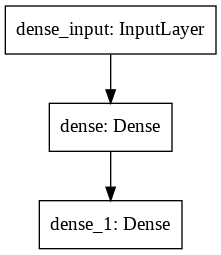

In [36]:
plot_model(model)

## Initial Weights and Biases

Keras oficial documentation says....

**kernel_initializer="glorot_uniform"**

**bias_initializer="zeros"**

In [37]:
weights = model.get_weights()

In [38]:
weights

[array([[ 0.09538102, -0.47044498, -0.08188921],
        [-0.5074294 ,  0.13748312, -0.8384285 ],
        [ 0.3996675 ,  0.5574477 , -0.8534326 ],
        [ 0.8555412 , -0.3046981 , -0.08766049]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.20394492],
        [-0.9421691 ],
        [ 0.44076228]], dtype=float32),
 array([0.], dtype=float32)]

In [39]:
weights[0]

array([[ 0.09538102, -0.47044498, -0.08188921],
       [-0.5074294 ,  0.13748312, -0.8384285 ],
       [ 0.3996675 ,  0.5574477 , -0.8534326 ],
       [ 0.8555412 , -0.3046981 , -0.08766049]], dtype=float32)

In [40]:
#y.dtype

## Train the Model

In [41]:
history = model.fit(X_train_std, y_train, epochs=100, batch_size=16, validation_data=(X_test_std, y_test))


Epoch 1/100
5/5 [==============================] - 1s 139ms/step - loss: 0.6561 - accuracy: 0.6050 - val_loss: 0.6561 - val_accuracy: 0.5667
Epoch 2/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6703 - accuracy: 0.5008 - val_loss: 0.6524 - val_accuracy: 0.6333
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6532 - accuracy: 0.6197 - val_loss: 0.6488 - val_accuracy: 0.6333
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6457 - accuracy: 0.6648 - val_loss: 0.6452 - val_accuracy: 0.6667
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6466 - accuracy: 0.6817 - val_loss: 0.6416 - val_accuracy: 0.8000
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6335 - accuracy: 0.7758 - val_loss: 0.6380 - val_accuracy: 0.8000
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6362 - accuracy: 0.7264 - val_loss: 0.6344 - val_accuracy: 0.8333
Epoch 8/100
5/5 [==

## Post Training - what are the Weights and Biases 

In [42]:
weights = model.get_weights()

In [43]:
weights
#weights[0]

[array([[ 0.5181165 , -0.862886  ,  0.39424208],
        [-0.923947  ,  0.5542432 , -1.2529502 ],
        [ 0.85636324,  0.12727521, -0.3779042 ],
        [ 1.3143284 , -0.73609453,  0.3884093 ]], dtype=float32),
 array([ 0.03035322, -0.0307981 ,  0.06957588], dtype=float32),
 array([[ 0.6448423],
        [-1.348846 ],
        [ 0.6566674]], dtype=float32),
 array([0.04883225], dtype=float32)]

## Plot Loss/Accuracy Curve for Training and Validation Data 

In [44]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

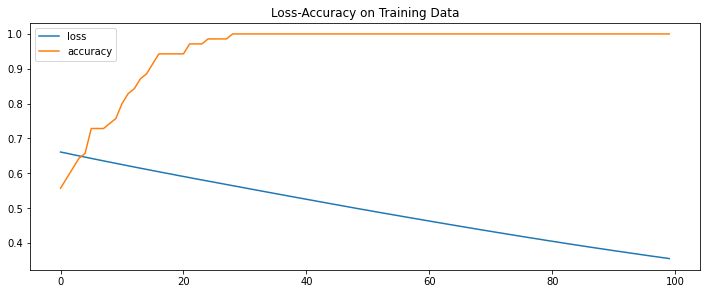

In [45]:
# Plot Loss/Accuracy Profile of the model on Training Data
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.title('Loss-Accuracy on Training Data')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()


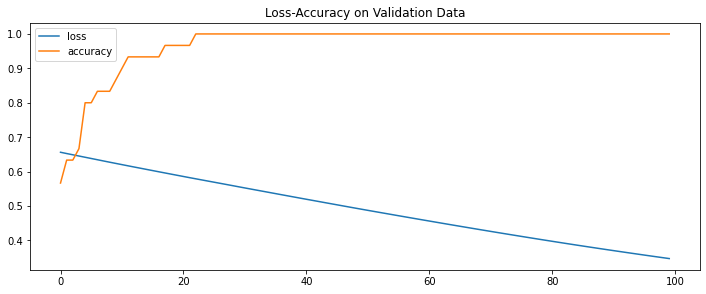

In [46]:
# Plot Loss/Accuracy Profile of the model on Test/Validation Data
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.title('Loss-Accuracy on Validation Data')
plt.plot(history.history['val_loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='accuracy')
plt.legend()

## Test/Make Predictions

In [47]:
# Actual predictions from the ANN are number between 0 and 1 (output of the Sigmoid activation)
pred = model.predict(X_test_std)
print(pred)

[[0.75327265]
 [0.7441682 ]
 [0.291552  ]
 [0.35656554]
 [0.27450067]
 [0.7228275 ]
 [0.6901907 ]
 [0.29841548]
 [0.31255263]
 [0.2774807 ]
 [0.35254171]
 [0.29313475]
 [0.28329507]
 [0.7101356 ]
 [0.75316846]
 [0.6620601 ]
 [0.6993574 ]
 [0.70659065]
 [0.32751566]
 [0.7043946 ]
 [0.31987765]
 [0.28520566]
 [0.30013388]
 [0.7384902 ]
 [0.7348082 ]
 [0.69694936]
 [0.73532665]
 [0.28131834]
 [0.29415768]
 [0.7136363 ]]


# Threshold the predictions to get binary output values 0/1

In [48]:
# pred.shape
r, c = pred.shape

pred1 = np.zeros(r, dtype=int)

# with sigmoid output activation for binary classification
for i in range(r):
 if pred[i] > 0.5:  # 0.5 is the threshold
  pred1[i] = 1 
 else: 
  pred1[i] = 0 


In [49]:
print('\n Actual class labels : \n', y_test)
print('\n Predictions made by the MLP : \n', pred1)


 Actual class labels : 
 [1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1]

 Predictions made by the MLP : 
 [1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1]


## Classification Metrics

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Accuracy

In [51]:
acc = accuracy_score(y_test, pred1) 
print(" Accuracy = ", round(acc *100, 2) , '%')

 Accuracy =  100.0 %


### Classification Report

In [52]:
print(classification_report (y_test, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Confusion Matrix

In [53]:
print(confusion_matrix (y_test, pred1))

[[15  0]
 [ 0 15]]


## Evaluate the Model on the Test Set

In [54]:
results = model.evaluate(X_test_std, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

1/1 [==============================] - 0s 16ms/step - loss: 0.3471 - accuracy: 1.0000
Final test set loss: 0.347127
Final test set accuracy: 1.000000


## Verify the Output with an Individual Sample

In [55]:
# Actual predictions from the ANN are numbers between 0 and 1 (output of the Sigmoid activations)

idx = 10 # Index of a data sample present in the Test set

indvidual_test_sample = X_test_std[idx,:].reshape(1, num_sel_feat)

print('\n Input sample Original : ' , X_test[idx,:].reshape(1, num_sel_feat) )
print('\n Input sample Standardize : ' , indvidual_test_sample )

pred = model.predict(indvidual_test_sample)
print('\n Predicted value : ', pred)

if pred > 0.5:
   pred1 = 1
else:
   pred1 = 0

print('\n Predicted label by the model : ', pred1)

print('\n True/Actual Label : ', y_test[idx])


 Input sample Original :  [[5.1 3.3 1.7 0.5]]

 Input sample Standardize :  [[-0.57303721  0.39221547 -0.80606545 -0.5162185 ]]

 Predicted value :  [[0.35254171]]

 Predicted label by the model :  0

 True/Actual Label :  0


# ++++++++++++++++++++++++++++++++++++++++++++++++++++
# **Part 3 :** 
#**Extracting the Activations of the Neurons from an arbitrary Layer of the MLP**
# ++++++++++++++++++++++++++++++++++++++++++++++++++++




## Custom Feature Extractor


In [56]:
# Output activations from the first hidden layer
h1 = model.get_layer(index=0)
#h1.output
# Output activations from the output layer
h2 = model.get_layer(index=1)
#h2.output

# Custom Feature Extractor
mlp_activations_extractor = Model(inputs=model.input, outputs=[h1.output, h2.output])

# Pass an input through the feature extractor and get the activations from the various layers
out = mlp_activations_extractor(indvidual_test_sample)

out

[<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.11944476, 0.72281015, 0.36733788]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.35254171]], dtype=float32)>]

In [57]:
#x = out[0].numpy()
#x.shape

# ++++++++++++++++++++++++++++++++++++++++++++++++++++
# **Part 4 :** 
#**Verify the output of the MLP Step-by-Step**
# ++++++++++++++++++++++++++++++++++++++++++++++++++++



### Verify the Output Generated by the MLP - Step-by-Step

Give the new sample as the input to the MLP and compute activations of each neurone.

In [58]:
# Define the Activation Functions
# ReLU
def relu (x):
  return np.maximum(0, x)

# Sigmoid
def sigmoid (x):
  z = 1/(1 + np.exp(-x))
  return z

In [59]:
# Net input to the neurons of the first hidden layer
net_in_h1 = (weights[0]*indvidual_test_sample.T).sum(axis=0) + weights[1]

# Output from the neurons of the first hidden layer after passing through the ReLU activation function
#out_h1 = relu(net_in_h1) # this is the input vector to the next layer 
out_h1 = sigmoid(net_in_h1) # this is the input vector to the next layer 

out_h1 

array([0.11944477, 0.72281014, 0.36733787])

In [60]:
# Net input to the neuron of the output layer
net_in_out = np.dot(weights[2].reshape(1,3), out_h1.reshape(3,1)) + weights[3]

# Output from the neuron of the output layer after passing through the Sigmoid activation function
out_out = sigmoid(net_in_out) 

out_out

array([[0.35254171]])

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++